In [1]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('D:/Data-Analysis/Stock Market/CSV/Ipca_Year.csv')

In [3]:
y = np.array(data['Close Price'])/max(data['Close Price'])

In [4]:
trade = np.array(data['% Deli. Qty to Traded Qty'])
for i in range(len(trade)):
    if (trade[i]>0):
        continue
    else:
        trade[i]=0
        
#trade
data['% Deli. Qty to Traded Qty']=trade

trade = np.array(data['Deliverable Quantity'])
for i in range(len(trade)):
    if (trade[i]>0):
        continue
    else:
        trade[i]=0
        
#trade
data['Deliverable Quantity']=trade

In [5]:
data = np.array(data)
data = data.transpose()
for i in range(len(data)):
    data[i]= data[i]/max(data[i])

data = data.transpose()
x_train, x_test, y_train, y_test = (np.array(data[:20]), np.array(data[20:]), y[:20], y[20:])

In [6]:
pca = PCA(n_components=7)
data = pca.fit(data).transform(data)

In [7]:
pca.explained_variance_

array([0.50160224, 0.20552904, 0.12694155, 0.05661301, 0.03522836,
       0.01079801, 0.0072074 ])

In [8]:
svr = SVR(gamma=0.01, C=1.0, epsilon=0.2)

In [9]:
data

array([[-6.04834373e-01, -1.78286761e-01, -5.85283516e-02,
        -3.50109404e-01,  1.73291963e-01,  9.66254760e-02,
        -1.07461194e-01],
       [-7.26890857e-01,  2.81223985e-01, -5.42734765e-02,
        -2.75043258e-01,  9.18358948e-02,  1.88034150e-02,
        -3.88137544e-02],
       [-8.16334051e-01,  4.23094133e-01, -8.24844482e-02,
        -1.73083934e-01,  1.18157540e-01, -7.46914865e-02,
        -1.36733091e-02],
       [-9.45729789e-01, -1.42970320e-02,  8.66271414e-02,
        -4.63408117e-02, -2.88789614e-02, -3.52204011e-02,
        -6.89578215e-02],
       [-7.94971069e-01,  5.22224378e-02,  2.41299802e-01,
         1.23956153e-01,  3.95681024e-02,  8.57686810e-02,
         4.32963286e-02],
       [-4.53024045e-01, -1.13663676e-01,  5.22509695e-01,
         4.22696616e-01,  2.56495602e-01,  2.41364379e-01,
         2.16132519e-01],
       [-8.71586768e-01,  2.13289531e-01, -3.61309837e-03,
        -1.68703882e-01,  1.15467837e-02, -3.38047435e-02,
        -5.2321461

In [10]:
x_train, x_test, y_train, y_test = (np.array(data[:20]), np.array(data[20:]), y[:20], y[20:])

In [11]:
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
svr.score(x_test,y_test)

-4.573184358439543

In [13]:
import matplotlib.pyplot as plt

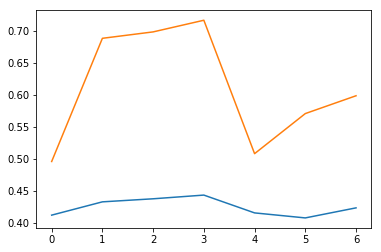

In [14]:
plt.plot(svr.predict(x_test))
plt.plot(y_test)
plt.show()

In [16]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()

In [17]:
mlp.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
x_pred = mlp.predict(x_test)

In [19]:
y_test

array([0.49558451, 0.68833835, 0.69836269, 0.71659745, 0.5078524 ,
       0.57057616, 0.59845339])

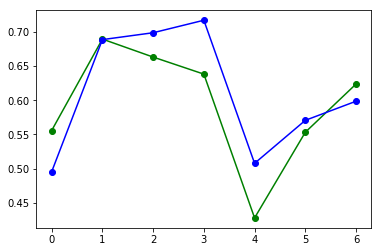

In [23]:
plt.plot(x_pred, "-og")
plt.plot(y_test, "-ob")
plt.show()